<a href="https://colab.research.google.com/github/bleedblue26/tensorflow/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import pathlib
import os

from google.colab import drive
import zipfile
import random

In [2]:
# What GPU
!nvidia-smi

Fri Sep  2 13:19:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Download Data

In [3]:
# https://www.kaggle.com/datasets/kmader/food41
# Mount google drive
# drive.mount('/content/gdrive')
# Unzip files
my_files = zipfile.ZipFile("/content/drive/MyDrive/data/hotdog_pizza.zip")
my_files.extractall()
my_files.close()

# Clean Data

### Delete unknown values

### Delete unneeded data

### Rename column

# Visualize data

In [4]:
# get random image from dir
def display_random_image(dir, class_type):
  img_dir = dir + "/" + class_type
  files = os.listdir(img_dir)
  img_name = random.choice(files)
  img = mpimg.imread(img_dir + '/' + img_name)

  plt.imshow(img)
  plt.title(class_type)
  plt.axis('off')

  print(f"Image shape: {img.shape}")


Image shape: (512, 512, 3)


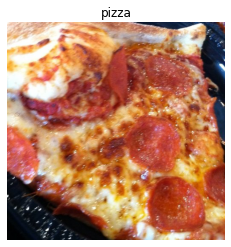

In [6]:
display_random_image("images/hotdog_pizza/", "pizza") # /content/images/pizza/1001116.jpg


Image shape: (512, 512, 3)


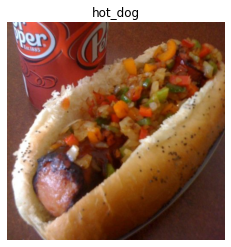

In [7]:
display_random_image("images/hotdog_pizza/", "hot_dog")

# Preprocess Data

# Process Data

### Separate training and testing data

In [8]:
data_dir = "images/hotdog_pizza/"
# import data, turn it into batches of 32 with size of 2568256
training_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = .2,
    subset = 'training',
    batch_size = 32,
    image_size = (256, 256),
    seed = 26
)
validation_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = .2,
    subset = 'validation',
    batch_size = 32,
    image_size = (256, 256),
    seed = 26
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [9]:
# get class names
class_names = training_data.class_names
class_names

['hot_dog', 'pizza']

### Normalize data

In [10]:
# normalize pixel values between 0 & 1
norm_layer = tf.keras.layers.Rescaling(1/255.)
training_data_norm = training_data.map(lambda x,y:(norm_layer(x), y))
validation_data_norm = validation_data.map(lambda x,y:(norm_layer(x), y))

In [11]:
# Check for normalization
image_batch, labels_batch = next(iter(training_data_norm))
image_batch[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.43529415, 0.22352943, 0.12156864],
        [0.44705886, 0.23529413, 0.13333334],
        [0.43725494, 0.22549021, 0.12352942],
        ...,
        [0.3911765 , 0.20686276, 0.08921569],
        [0.39705884, 0.21274512, 0.09509805],
        [0.3784314 , 0.19411767, 0.07647059]],

       [[0.43137258, 0.21960786, 0.11764707],
        [0.45098042, 0.2392157 , 0.13725491],
        [0.43431374, 0.22254904, 0.12058824],
        ...,
        [0.39607847, 0.21176472, 0.09411766],
        [0.38529414, 0.20098041, 0.08333334],
        [0.3921569 , 0.20784315, 0.09019608]],

       [[0.4382353 , 0.2264706 , 0.12450981],
        [0.43333337, 0.22156864, 0.11960785],
        [0.44509807, 0.23333335, 0.13137256],
        ...,
        [0.39901963, 0.20686276, 0.08921569],
        [0.4039216 , 0.21176472, 0.09411766],
        [0.39901963, 0.2147059 , 0.09705883]],

       ...,

       [[0.18137255, 0.13431373, 0.14215687],
        [0.17

# Build Neural Network

## Non-CNN model

In [12]:
tf.random.set_seed(26)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (256, 256, 3)), 
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
]
)

model_1.compile(
    optimizer='Adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)
fit_data = model_1.fit(training_data_norm, 
                       epochs=5, 
                       validation_data=validation_data_norm,
                       validation_steps=len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 9s 88ms/step - loss: 4.3080 - accuracy: 0.5506 - val_loss: 0.9426 - val_accuracy: 0.5875
Epoch 2/5
50/50 [==============================] - 5s 83ms/step - loss: 0.8159 - accuracy: 0.6169 - val_loss: 1.5319 - val_accuracy: 0.4950
Epoch 3/5
50/50 [==============================] - 5s 83ms/step - loss: 0.6918 - accuracy: 0.6594 - val_loss: 0.5965 - val_accuracy: 0.7175
Epoch 4/5
50/50 [==============================] - 5s 84ms/step - loss: 0.6330 - accuracy: 0.6862 - val_loss: 0.6061 - val_accuracy: 0.6825
Epoch 5/5
50/50 [==============================] - 5s 91ms/step - loss: 0.6484 - accuracy: 0.6775 - val_loss: 0.7760 - val_accuracy: 0.5900


## CNN Model

In [13]:
tf.random.set_seed(26)
model_2 = tf.keras.Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(256,256,3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
]
)

model_2.compile(
    optimizer='Adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)
fit_data = model_2.fit(training_data_norm, 
                       epochs=5, 
                       steps_per_epoch=len(training_data_norm),
                       validation_data=validation_data_norm,
                       validation_steps=len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 16s 109ms/step - loss: 0.6219 - accuracy: 0.6756 - val_loss: 0.5523 - val_accuracy: 0.7425
Epoch 2/5
50/50 [==============================] - 6s 101ms/step - loss: 0.4545 - accuracy: 0.7925 - val_loss: 0.7430 - val_accuracy: 0.6550
Epoch 3/5
50/50 [==============================] - 6s 101ms/step - loss: 0.3489 - accuracy: 0.8525 - val_loss: 0.4930 - val_accuracy: 0.7825
Epoch 4/5
50/50 [==============================] - 7s 129ms/step - loss: 0.2017 - accuracy: 0.9425 - val_loss: 0.5303 - val_accuracy: 0.7450
Epoch 5/5
50/50 [==============================] - 6s 103ms/step - loss: 0.1141 - accuracy: 0.9656 - val_loss: 0.6414 - val_accuracy: 0.7425


### Plot loss & accuracy

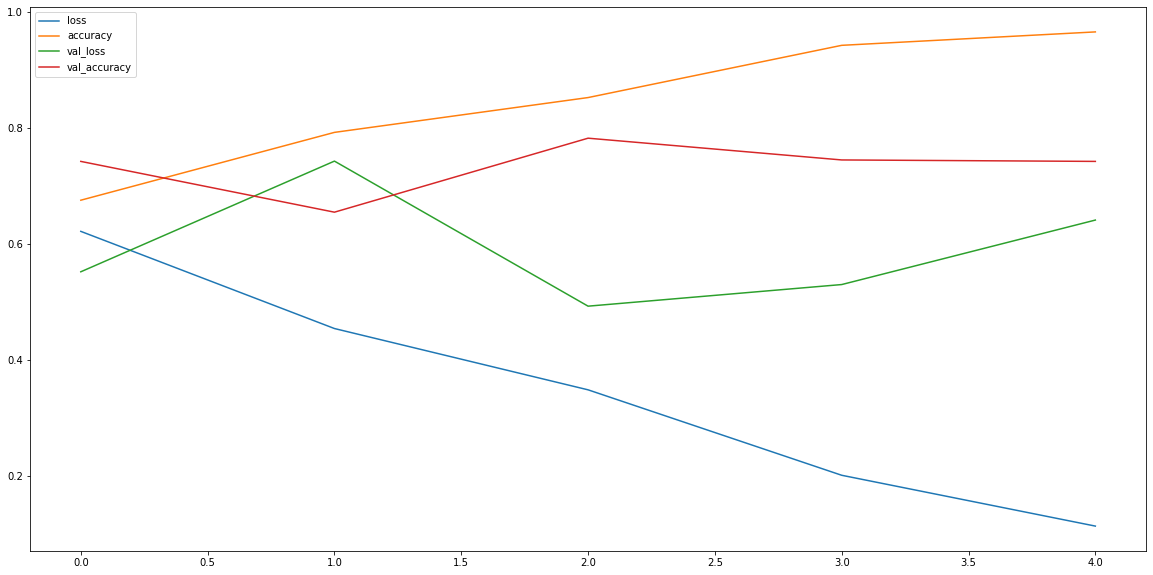

In [14]:
pd.DataFrame(fit_data.history).plot(figsize=(20,10))

## Reduce overfitting with pooling

In [15]:
tf.random.set_seed(26)
model_3 = tf.keras.Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(256,256,3)),
    MaxPool2D(pool_size=2,
              padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
]
)

model_3.compile(
    optimizer='Adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)
fit_data_3 = model_3.fit(training_data_norm, 
                       epochs=5, 
                       steps_per_epoch=len(training_data_norm),
                       validation_data=validation_data_norm,
                       validation_steps=len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 6s 90ms/step - loss: 0.6375 - accuracy: 0.6288 - val_loss: 0.5793 - val_accuracy: 0.7025
Epoch 2/5
50/50 [==============================] - 5s 90ms/step - loss: 0.5321 - accuracy: 0.7437 - val_loss: 0.5075 - val_accuracy: 0.7350
Epoch 3/5
50/50 [==============================] - 5s 91ms/step - loss: 0.4961 - accuracy: 0.7644 - val_loss: 0.5015 - val_accuracy: 0.7300
Epoch 4/5
50/50 [==============================] - 5s 92ms/step - loss: 0.4932 - accuracy: 0.7700 - val_loss: 0.4822 - val_accuracy: 0.7625
Epoch 5/5
50/50 [==============================] - 5s 90ms/step - loss: 0.4651 - accuracy: 0.7894 - val_loss: 0.4783 - val_accuracy: 0.7725


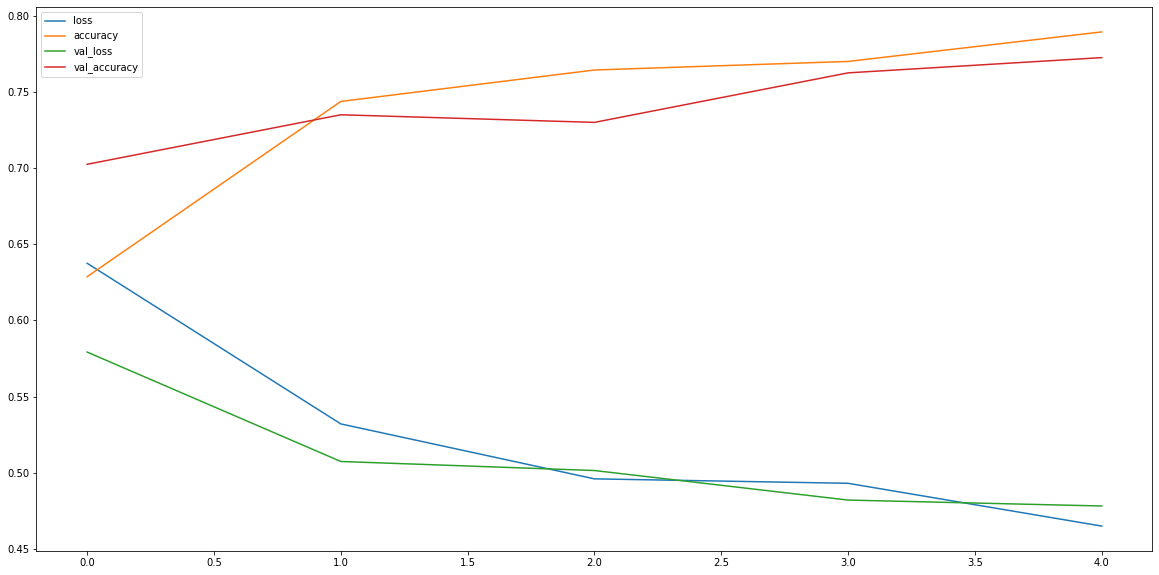

In [16]:
pd.DataFrame(fit_data_3.history).plot(figsize=(20,10))

## Augmentaion data to avoid overfitting

In [17]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(.2),
])

In [18]:
tf.random.set_seed(26)
model_4 = tf.keras.Sequential([
    data_augmentation,
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(256,256,3)),
    MaxPool2D(pool_size=2,
              padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
]
)

model_4.compile(
    optimizer='Adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)
fit_data_4 = model_4.fit(training_data_norm, 
                       epochs=5, 
                       steps_per_epoch=len(training_data_norm),
                       validation_data=validation_data_norm,
                       validation_steps=len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 7s 93ms/step - loss: 0.6457 - accuracy: 0.6094 - val_loss: 0.6176 - val_accuracy: 0.6500
Epoch 2/5
50/50 [==============================] - 5s 91ms/step - loss: 0.5703 - accuracy: 0.6988 - val_loss: 0.5482 - val_accuracy: 0.7175
Epoch 3/5
50/50 [==============================] - 5s 91ms/step - loss: 0.5357 - accuracy: 0.7369 - val_loss: 0.5191 - val_accuracy: 0.7475
Epoch 4/5
50/50 [==============================] - 5s 93ms/step - loss: 0.5528 - accuracy: 0.7063 - val_loss: 0.5311 - val_accuracy: 0.7275
Epoch 5/5
50/50 [==============================] - 7s 126ms/step - loss: 0.5214 - accuracy: 0.7419 - val_loss: 0.5556 - val_accuracy: 0.7150


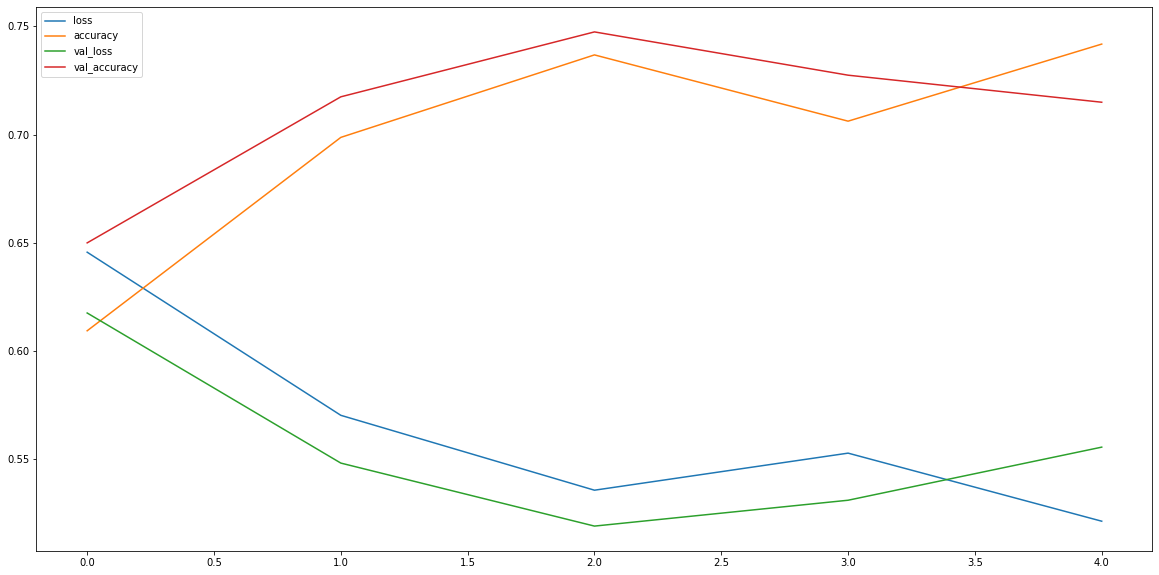

In [19]:
pd.DataFrame(fit_data_4.history).plot(figsize=(20,10))

# Make predictions

(-0.5, 258.5, 193.5, -0.5)

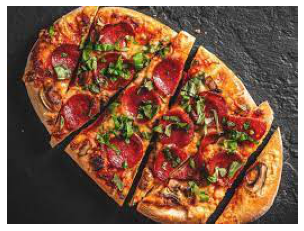

In [20]:
my_pizza = mpimg.imread("/content/drive/MyDrive/data/pizza_test.jpeg")
plt.imshow(my_pizza)
plt.axis(False)

## Normalize and resize

In [21]:
my_pizza.shape

(194, 259, 3)

In [24]:
my_pizza = tf.io.read_file("/content/drive/MyDrive/data/pizza_test.jpeg")
# turn image into tensor
my_pizza = tf.image.decode_image(my_pizza)
# resize
my_pizza = tf.image.resize(my_pizza, size=[256,256])
# normalize
my_pizza = my_pizza/255
my_pizza

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.1764706 , 0.1764706 , 0.1764706 ],
        [0.1764706 , 0.1764706 , 0.1764706 ],
        [0.1764706 , 0.1764706 , 0.1764706 ],
        ...,
        [0.25478706, 0.25478706, 0.25478706],
        [0.27801776, 0.27801776, 0.27801776],
        [0.30182293, 0.30182293, 0.30182293]],

       [[0.1764706 , 0.1764706 , 0.1764706 ],
        [0.1764706 , 0.1764706 , 0.1764706 ],
        [0.1764706 , 0.1764706 , 0.1764706 ],
        ...,
        [0.22724763, 0.22724763, 0.22724763],
        [0.25055146, 0.25055146, 0.25055146],
        [0.2743566 , 0.2743566 , 0.2743566 ]],

       [[0.1764706 , 0.1764706 , 0.1764706 ],
        [0.1764706 , 0.1764706 , 0.1764706 ],
        [0.1764706 , 0.1764706 , 0.1764706 ],
        ...,
        [0.24257526, 0.24257526, 0.24257526],
        [0.26737133, 0.26737133, 0.26737133],
        [0.2927146 , 0.2927146 , 0.2927146 ]],

       ...,

       [[0.10980392, 0.10980392, 0.10980392],
        [0.10

In [25]:
prediction = model_4.predict(tf.expand_dims(my_pizza, axis=0))
prediction

array([[0.96290123]], dtype=float32)

In [26]:
predicted_class = class_names[int(tf.round(prediction))]
predicted_class

'pizza'